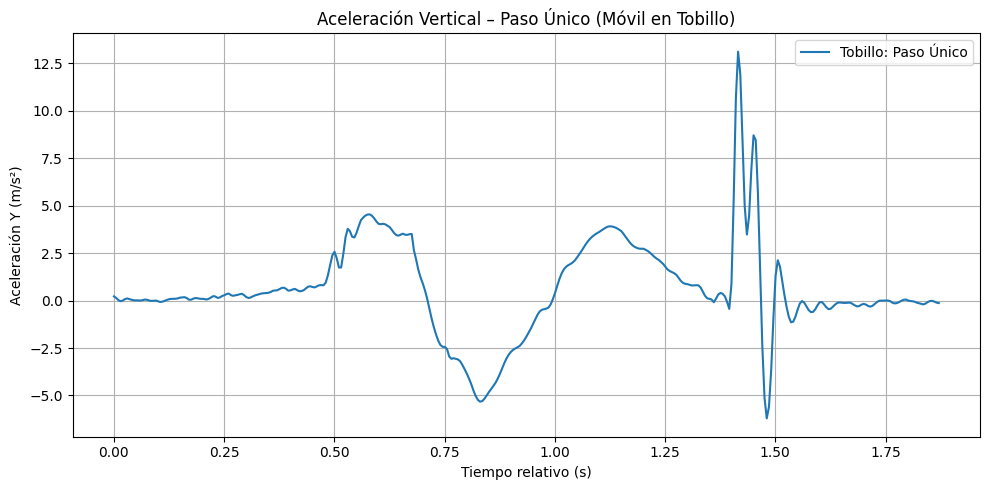

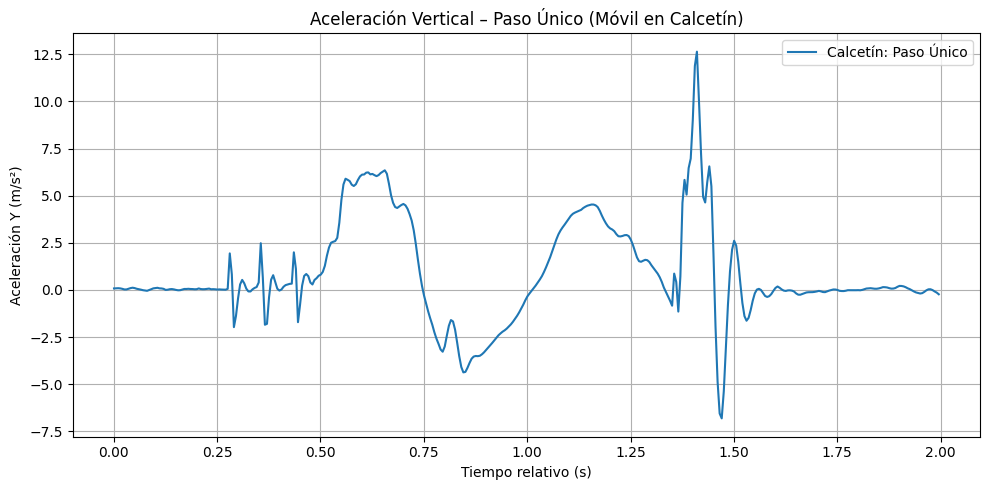

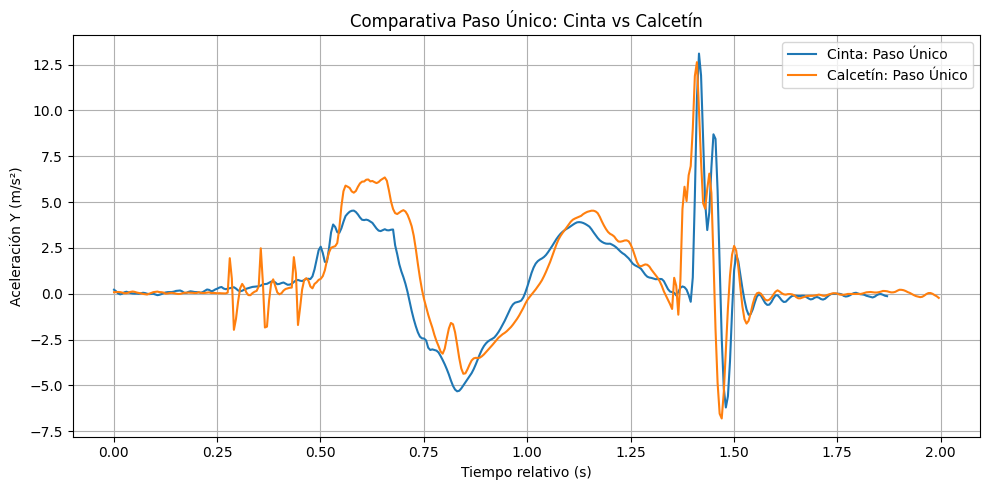

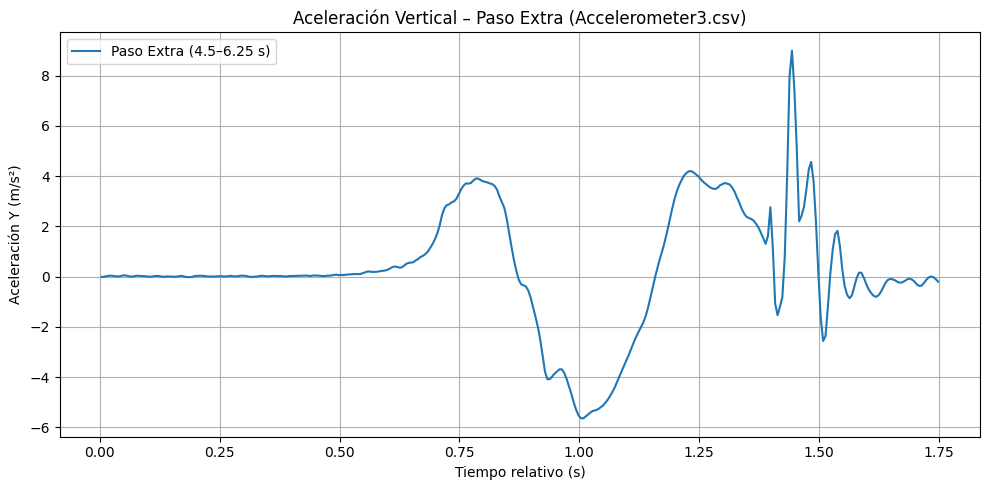

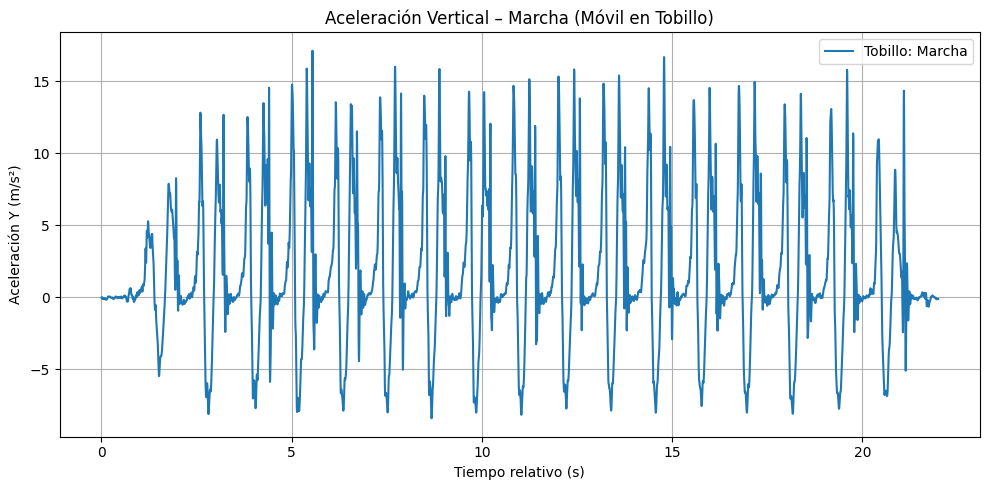

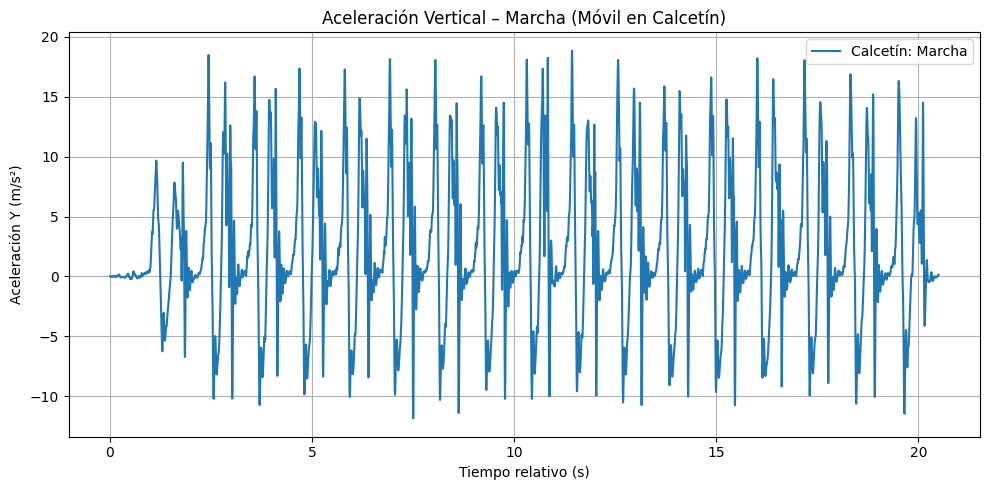

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import csv

# Función para cargar la componente vertical (eje Y) de un CSV
def load_vertical_acceleration(filename):
    time, y_acc = [], []
    with open(filename, 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            time.append(float(row['seconds_elapsed']))
            y_acc.append(float(row['y']))
    return np.array(time), np.array(y_acc)

# Intervalos definidos para pasos únicos y marchas
t_single_ankle      = (90.625, 92.5)   # Paso único tobillo (Accelerometer.csv)
t_single_sock_csv1   = (13.0, 15.0)     # Paso único calcetín (Accelerometer1.csv)
t_march_ankle        = (140.0, 162.0)   # Marcha tobillo (Accelerometer.csv)
t_march_sock_csv2    = (7.5, 28.0)      # Marcha calcetín (Accelerometer2.csv)
t_step3_interval     = (4.5, 6.25)      # Paso extra (Accelerometer3.csv)

# Cargar datos
time_ankle,       y_ankle       = load_vertical_acceleration('Accelerometer.csv')
time_sock_csv1,   y_sock_csv1   = load_vertical_acceleration('Accelerometer1.csv')
time_sock_csv2,   y_sock_csv2   = load_vertical_acceleration('Accelerometer2.csv')
time_step3,       y_step3       = load_vertical_acceleration('Accelerometer3.csv')

# Máscaras para filtrar intervalos
mask_ankle_single     = (time_ankle       >= t_single_ankle[0])    & (time_ankle       <= t_single_ankle[1])
mask_sock_single_csv1  = (time_sock_csv1   >= t_single_sock_csv1[0]) & (time_sock_csv1   <= t_single_sock_csv1[1])
mask_ankle_march      = (time_ankle       >= t_march_ankle[0])      & (time_ankle       <= t_march_ankle[1])
mask_sock_march_csv2  = (time_sock_csv2   >= t_march_sock_csv2[0])  & (time_sock_csv2   <= t_march_sock_csv2[1])
mask_step3            = (time_step3       >= t_step3_interval[0])   & (time_step3       <= t_step3_interval[1])

# --- Paso único tobillo ---
t_rel_ankle = time_ankle[mask_ankle_single] - t_single_ankle[0]
plt.figure(figsize=(10,5))
plt.plot(t_rel_ankle, y_ankle[mask_ankle_single], label='Tobillo: Paso Único')
plt.title('Aceleración Vertical – Paso Único (Móvil en Tobillo)')
plt.xlabel('Tiempo relativo (s)')
plt.ylabel('Aceleración Y (m/s²)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Paso único calcetín (Accelerometer1.csv) ---
t_rel_sock1 = time_sock_csv1[mask_sock_single_csv1] - t_single_sock_csv1[0]
plt.figure(figsize=(10,5))
plt.plot(t_rel_sock1, y_sock_csv1[mask_sock_single_csv1], label='Calcetín: Paso Único')
plt.title('Aceleración Vertical – Paso Único (Móvil en Calcetín)')
plt.xlabel('Tiempo relativo (s)')
plt.ylabel('Aceleración Y (m/s²)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Comparativa superpuesta pasos únicos ---
plt.figure(figsize=(10,5))
plt.plot(t_rel_ankle, y_ankle[mask_ankle_single], label='Cinta: Paso Único')
plt.plot(t_rel_sock1, y_sock_csv1[mask_sock_single_csv1], label='Calcetín: Paso Único')
plt.title('Comparativa Paso Único: Cinta vs Calcetín')
plt.xlabel('Tiempo relativo (s)')
plt.ylabel('Aceleración Y (m/s²)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Paso extra (Accelerometer3.csv): solo 4.5–6.25 s ---
t_rel_step3 = time_step3[mask_step3] - t_step3_interval[0]
plt.figure(figsize=(10,5))
plt.plot(t_rel_step3, y_step3[mask_step3], label=f'Paso Extra ({t_step3_interval[0]}–{t_step3_interval[1]} s)')
plt.title('Aceleración Vertical – Paso Extra (Accelerometer3.csv)')
plt.xlabel('Tiempo relativo (s)')
plt.ylabel('Aceleración Y (m/s²)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Marcha tobillo ---
t_rel_march_ankle = time_ankle[mask_ankle_march] - t_march_ankle[0]
plt.figure(figsize=(10,5))
plt.plot(t_rel_march_ankle, y_ankle[mask_ankle_march], label='Tobillo: Marcha')
plt.title('Aceleración Vertical – Marcha (Móvil en Tobillo)')
plt.xlabel('Tiempo relativo (s)')
plt.ylabel('Aceleración Y (m/s²)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Marcha calcetín (Accelerometer2.csv) ---
t_rel_sock2 = time_sock_csv2[mask_sock_march_csv2] - t_march_sock_csv2[0]
plt.figure(figsize=(10,5))
plt.plot(t_rel_sock2, y_sock_csv2[mask_sock_march_csv2], label='Calcetín: Marcha')
plt.title('Aceleración Vertical – Marcha (Móvil en Calcetín)')
plt.xlabel('Tiempo relativo (s)')
plt.ylabel('Aceleración Y (m/s²)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
